In [1]:
%matplotlib inline

In [2]:
import numpy as np
import kali.carma

/home/kali/python/kali/lc.py:29: UserWarning: No display environment! Using matplotlib backend "Agg"
  warnings.warn('No display environment! Using matplotlib backend "Agg"')
/home/conda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# load obs_hist data
npz = np.load('/home/mount/obs_hist.npz')
pos_gap = npz['pos_gap'] # [ra, dec, gap]
obsHist = npz['obsHist'] # obsHist in structured array

In [4]:
date_in_s = obsHist['expDate'] # get expDate from history

In [5]:
# Initiate carma task
Task = kali.carma.CARMATask(2,1,nsteps = 1000)
# assign root values and amplitude 
r_1 = (-1.0/107.8) + 0j
r_2 = (-1.0/33.2) + 0j
m_1 = (-1.0/5.5) + 0j
amp = 1.0

# solve for coefficients from provided roots
Rho = np.array([r_1, r_2, m_1, amp])
Theta = kali.carma.coeffs(2, 1, Rho)
print Theta
print Task.check(Theta)

[ 0.03939692  0.00027941  0.0046724   0.0256982 ]
True


In [119]:
# set sampling rate for Task
dt = pos_gap[2]/24 # gap from MAF is in hours and Kali in days
Task.set(dt, Theta, tnum = 0)

0

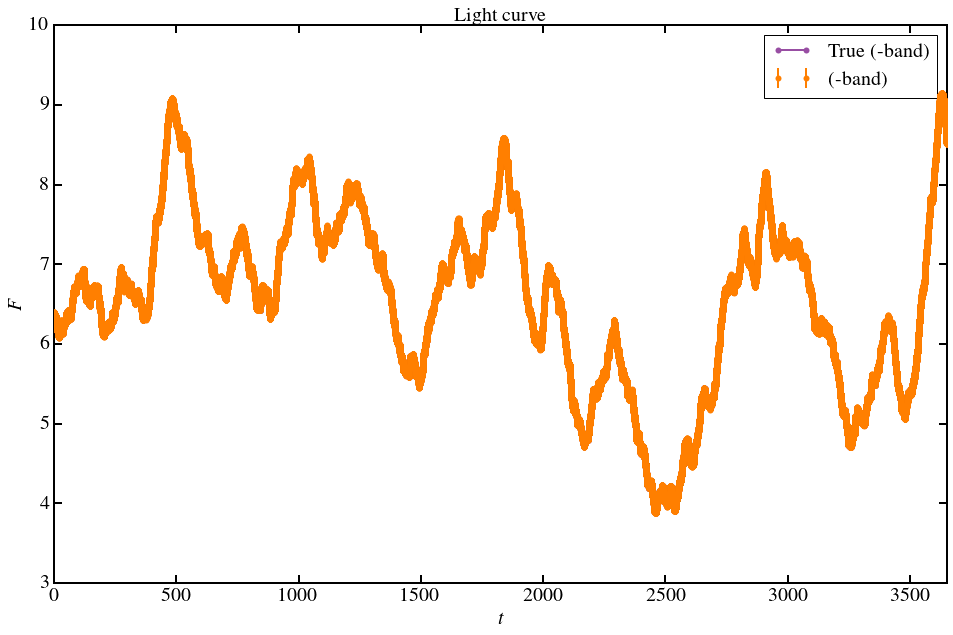

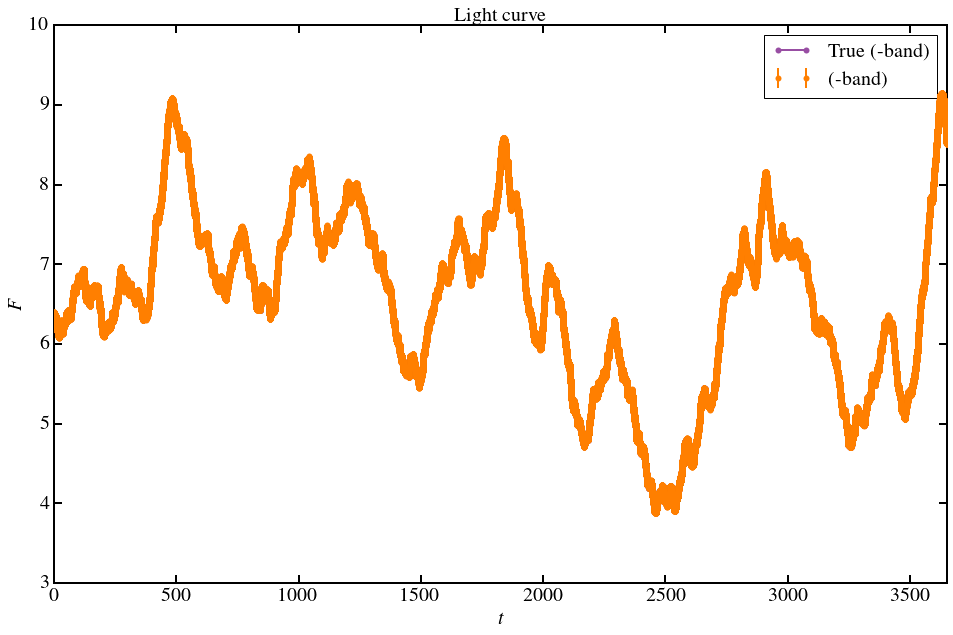

In [120]:
# simulate a mock lc with given parameters, add noise and plot the curve
LC = Task.simulate(duration=3650)
Task.observe(LC)
LC.plot()

In [195]:
# Sample based on opsim history
t_s = np.around(LC.t*86400).astype('int') # convert from days to seconds
gap_in_s = np.around(pos_gap[2]*3600) # from hours to seconds
# determine the approximate index of mock LC data point for each real observation
division = np.around(obsHist['expDate']/gap_in_s)
mask = [round(x/gap_in_s) in division for x in t_s]

In [222]:
# downsample the mock LC using the approximate index obtained above
new_t = LC.t[np.where(mask)]
new_x = LC.x[np.where(mask)]
new_y = LC.y[np.where(mask)]
new_yerr = LC.yerr[np.where(mask)]

In [202]:
from matplotlib import pyplot as plt

In [236]:
from kali.lc import externalLC

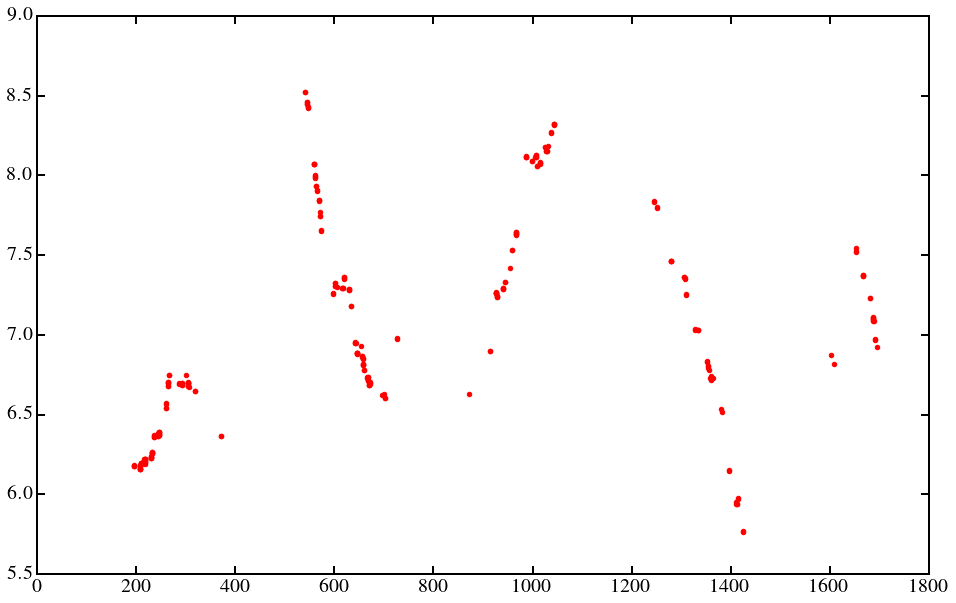

In [262]:
# simple plot to show the downsampled LC
f = plt.figure(figsize=(16, 10))
plt.scatter(new_t, new_x - np.mean(new_x) + np.mean(new_y), marker='o', color='r')